# Teoria de Markowits

O foco da teoria é otimizar o portifolio baseado no risco x retorno.

Quanto mais proxima de 0 a correlacao dos ativos for, menos risco você tem.

Então o ideal é pegar os melhores ativos com correlacao 0 entre eles.

## Parte 1 - Importando e Cálculos base

In [16]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importando o data base

tickers = ['BTOW3.SA', 'MGLU3.SA']
start_period = '2012-7-1'

pf_data = pd.DataFrame()

for a in tickers:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start=start_period)['Adj Close']

In [3]:
# pf_data.tail()

In [4]:
# Normalizando os dados


# (pf_data / pf_data.iloc[0]*100).plot(figsize=(10,5))

In [5]:
# Pegando os log retornos diários

log_returns = np.log(pf_data / pf_data.shift(1))

# log_returns.mean()

In [6]:
# Criando a matriz de covariância

# log_returns.cov()

In [7]:
# Capturando o numero de ações no portifolio

num_assets = len(tickers)

# num_assets

In [8]:
# Criando 2 valores entre 0 e 1 e que a soma é 1

# pesos = np.random.random(num_assets)
# pesos /= np.sum(pesos)
# pesos

In [9]:
# Plotando um ponto especifico

#peso_teste = np.array([0.2733, 0.4470, 0.2449, 0.0348])
#return_teste = np.sum(peso_teste*log_returns.mean()*250)
#risco_teste = np.sqrt(np.dot(peso_teste.T, np.dot(log_returns.cov()*250, peso_teste)))

## Parte 2

#### Taxa de retorno esperada para o portifólio

In [10]:
# np.sum(pesos*log_returns.mean()) * 250

#### Variância do portifólio esperada

In [11]:
# np.dot(pesos.T, np.dot(log_returns.cov()*250, pesos))

#### Volatilidade do portifólio esperada

In [12]:
# np.sqrt(np.dot(pesos.T, np.dot(log_returns.cov()*250, pesos)))

O peso de menor risco é:
- BTOW3.SA: 51.01%.
- MGLU3.SA: 48.99%.


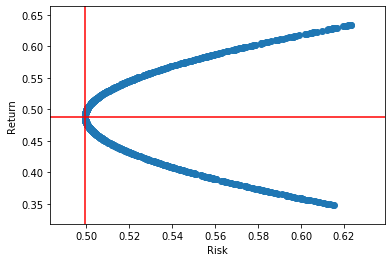

In [13]:
# Fazendo 1000 simulações variando os pesos

port_returns = []
port_risk = []
num_testes = 1000

best_risk = 100

for i in range(num_testes):
    # variação dos pesos
    pesos = np.random.random(num_assets)
    pesos /= np.sum(pesos)
    
    # capturando os dados risco x retorno para o grafico
    risk = np.sqrt(np.dot(pesos.T, np.dot(log_returns.cov()*250, pesos)))
    port_returns.append(np.sum(pesos*log_returns.mean()*250))
    port_risk.append(risk)
    
    # capturando o ponto de flexão da carteira (menor risco)
    if((best_risk > risk)):
        best_risk = risk
        front_pesos = pesos

# plotando o ponto de flexão da carteira
best_return = np.sum(front_pesos*log_returns.mean()*250)

# Transformando lista em array

port_returns = np.array(port_returns)
port_risk = np.array(port_risk)

print("O peso de menor risco é:")
for i in range(num_assets):
    print("- " + tickers[i] + ": " + str(round(front_pesos[i]*100,2)) + "%.")
    
plt.scatter(port_risk,port_returns)
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel("Risk")
plt.ylabel("Return")
plt.axvline(x=best_risk,color='red', linestyle='-', label='fronteira eficiente')
plt.axhline(y=best_return, color='red', linestyle='-')
plt.show()

In [14]:
# Tranformando os dados em um data frame

# port_info = pd.DataFrame({'Return': port_returns, 'Risk': port_risk})

# port_info.head()

In [15]:
# Plotando de uma forma diferente

# port_info.plot(x='Risk', y='Return', kind='scatter', figsize=(10,5))
# plt.xlabel("Risk")
# plt.ylabel("Return")